In [1]:
%load_ext autoreload
%autoreload 2
%aimport

Modules to reload:
all-except-skipped

Modules to skip:



In [2]:
%matplotlib inline

In [3]:
#!/usr/bin/env python3
from abc import ABC
from abc import abstractmethod
from collections import defaultdict
from pathlib import Path
from typing import Dict

import corner
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u

from relaxed import plotting as rxplots
from relaxed.correlations import add_box_indices
from relaxed.correlations import get_2d_corr
from relaxed.correlations import spearmanr
from relaxed.correlations import vol_jacknife_err
from relaxed.cosmo import get_a_from_t
from relaxed.cosmo import get_fractional_tdyn
from relaxed.cosmo import get_t_from_a
from relaxed.fits import alpha_analysis
from relaxed.fits import get_early_late
from relaxed.gradients import get_savgol_grads
from relaxed.mah import get_an_from_am
from relaxed.mah import get_mah
from relaxed.models import opcam_dict
from relaxed.models import prepare_datasets
from relaxed.models import training_suite
from relaxed.plotting import CB_COLORS
from relaxed.plotting import MARKS
from relaxed.plotting import set_rc

plt.ioff()

In [4]:
plt.rcParams.update({"text.usetex": True,})

In [16]:
mahdir = "../../data/processed/bolshoi_m12"
mah_data = get_mah(mahdir, cutoff_missing=0.05, cutoff_particle=0.05, log_mbin_spacing=False)
mass_bins = mah_data["mass_bins"]
am = mah_data["am"]
scales = mah_data["scales"]
ma = mah_data["ma"]
cat = mah_data['cat']

In [22]:
ma.shape

(10000, 165)

In [21]:
np.sum(ma[:, 0] < 2*1.35e8 / cat['mvir'].data)

117

In [7]:
print(min(scales))
print(len(scales))

0.18635
165


Text(0.5, 0, '$a$')

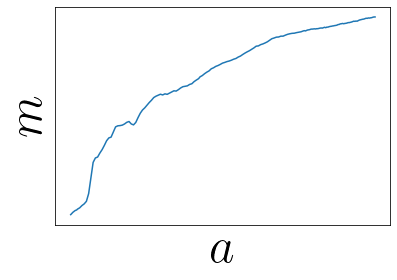

In [31]:
fig, ax = plt.subplots(1,1)
plt.plot(scales, ma[10, :])
plt.xticks([])
plt.yticks([])
plt.ylabel("$m$", size=50)
plt.xlabel("$a$", size=50)

([], [])

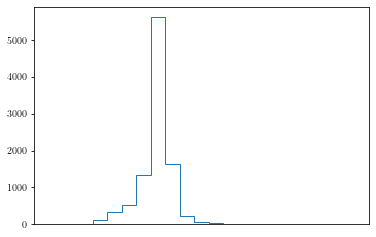

In [32]:
plt.hist(ma[:, 110], bins=21, histtype='step')
plt.xticks([])

([], [])

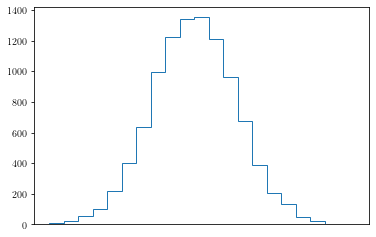

In [25]:
plt.hist(np.random.randn(10000), bins=21, histtype='step')
plt.xticks([])

([], [])

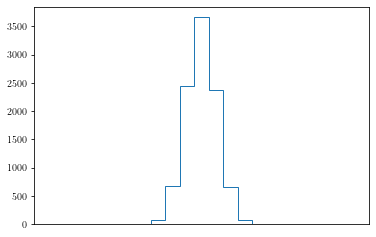

In [36]:
plt.hist(np.random.randn(10000)*0.3, bins=21, histtype='step', range=(-3, 3))
plt.xticks([])

In [7]:
import scipy

([], [])

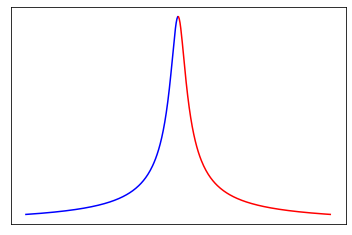

In [65]:
x = np.linspace(-2, 2, 400)
y = scipy.stats.t.pdf(x, df=0.01)
half1 = x <= 0
half2 = x > 0 
x1, y1 = x[half1], y[half1]
x2, y2 = x[half2], y[half2]
plt.plot(x1,y1, color='b')
plt.plot(x2,y2, color='r')
plt.xticks([])
plt.yticks([])

([], [])

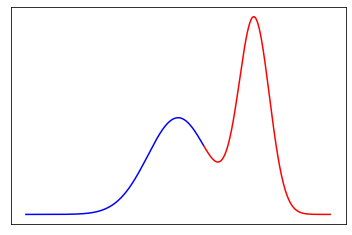

In [71]:
x = np.linspace(-3, 3, 500)
y = scipy.stats.norm.pdf(x, scale=0.6) + scipy.stats.norm.pdf(x, loc=1.5, scale=0.3)
half1 = x <= 0.5
half2 = x > 0.5
x1, y1 = x[half1], y[half1]
x2, y2 = x[half2], y[half2]
plt.plot(x1,y1, color='b')
plt.plot(x2,y2, color='r')
plt.xticks([])
plt.yticks([])

([], [])

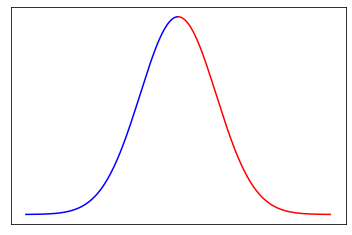

In [67]:
x = np.linspace(-4, 4, 400)
y = scipy.stats.norm.pdf(x)
half1 = x <= 0
half2 = x > 0 
x1, y1 = x[half1], y[half1]
x2, y2 = x[half2], y[half2]
plt.plot(x1,y1, color='b')
plt.plot(x2,y2, color='r')
plt.xticks([])
plt.yticks([])

([], [])

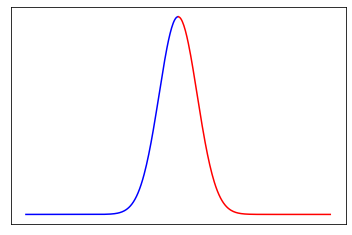

In [68]:
x = np.linspace(-4, 4, 400)
y = scipy.stats.norm.pdf(x, scale=0.5)
half1 = x <= 0
half2 = x > 0 
x1, y1 = x[half1], y[half1]
x2, y2 = x[half2], y[half2]
plt.plot(x1,y1, color='b')
plt.plot(x2,y2, color='r')
plt.xticks([])
plt.yticks([])